In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
import statsmodels.tsa.api as smtsa

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
def plotds(xt, nlag=30, fig_size=(12, 10)):
    if not isinstance(xt, pd.Series):
         xt = pd.Series(xt)
    plt.figure(figsize=fig_size)
    layout = (2, 2)
    
    ax_xt = plt.subplot2grid(layout, (0, 0), colspan=2)
    ax_acf= plt.subplot2grid(layout, (1, 0))
    ax_pacf = plt.subplot2grid(layout, (1, 1))
    
    xt.plot(ax=ax_xt)
    ax_xt.set_title('Time Series')
    plot_acf(xt, lags=50, ax=ax_acf)
    plot_pacf(xt, lags=50, ax=ax_pacf)
    plt.tight_layout()
    return None

In [3]:
n = 600

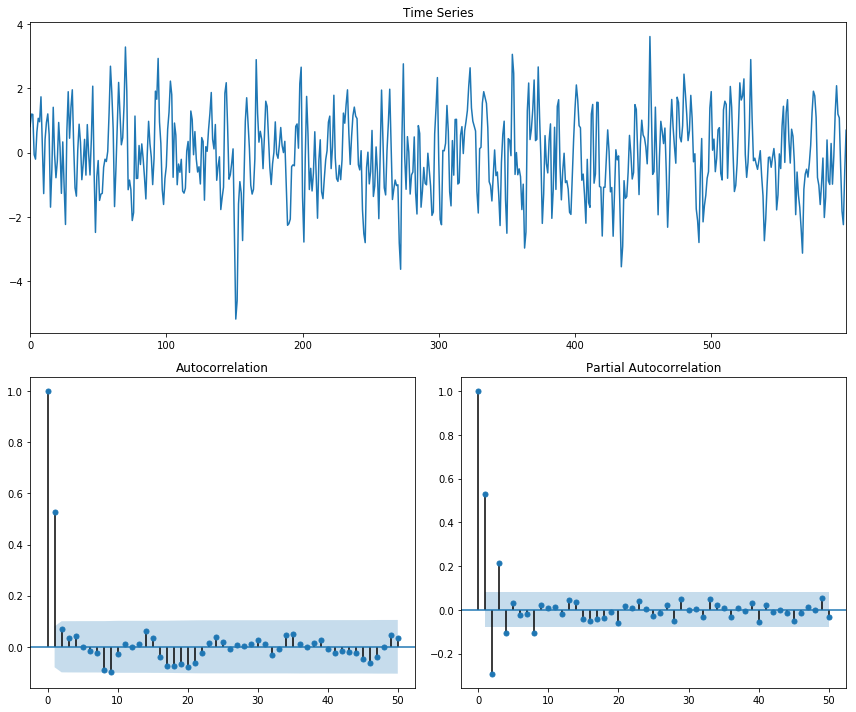

In [4]:
ar = np.r_[1, -0]
ma = np.r_[1, 0.7]
ma1_data = smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=n) 
plotds(ma1_data)

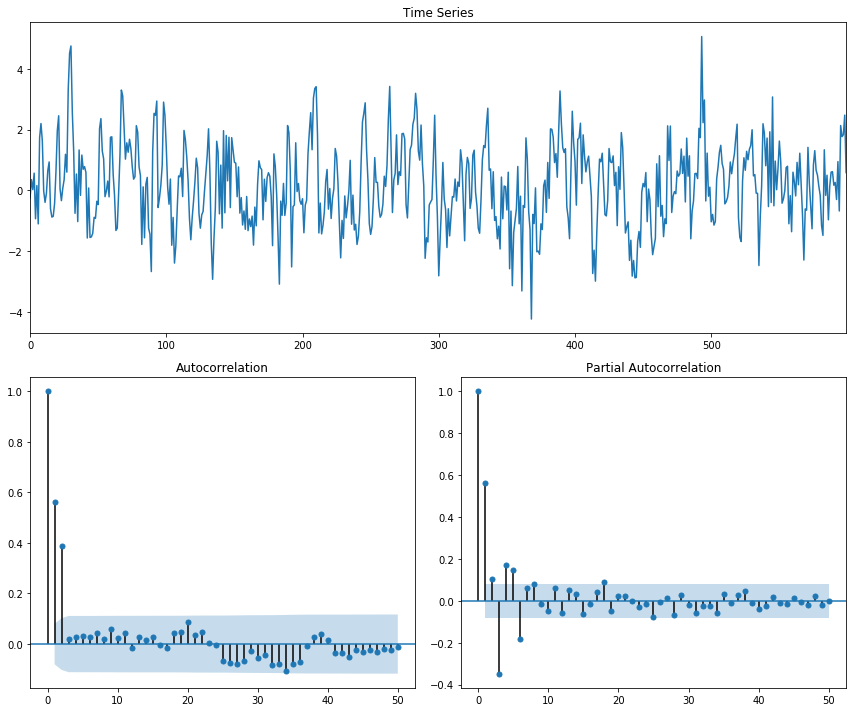

In [5]:
ar = np.r_[1, -0]
ma = np.r_[1, 0.6, 0.7]
ma2_data = smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=n) 
plotds(ma2_data)

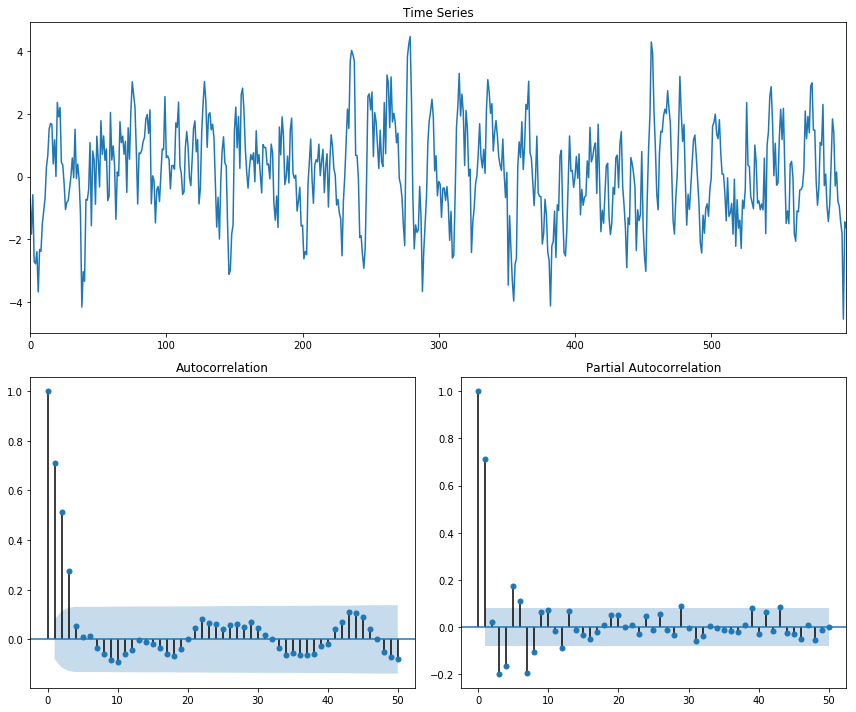

In [6]:
ar = np.r_[1, -0]
ma = np.r_[1, 0.6, 0.7, 0.5]
ma3_data = smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=n) 
plotds(ma3_data)

In [7]:
ma1 = smtsa.ARMA(ma1_data.tolist(), order=(0, 1)).fit(
    maxlag=30, method='mle', trend='nc')
ma1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  600
Model:                     ARMA(0, 1)   Log Likelihood                -855.441
Method:                           mle   S.D. of innovations              1.006
Date:                Fri, 08 Dec 2017   AIC                           1714.882
Time:                        13:19:30   BIC                           1723.676
Sample:                             0   HQIC                          1718.305
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1.y        0.7062      0.027     26.206      0.000       0.653       0.759
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.4160           +0.0000j            1.4160            0.5000
-----------------------------------------------------------------------------
"""

In [8]:
ma3 = smtsa.ARMA(ma3_data.tolist(), order=(0, 3)).fit(
    maxlag=30, method='mle', trend='nc')
ma3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  600
Model:                     ARMA(0, 3)   Log Likelihood                -848.270
Method:                           mle   S.D. of innovations              0.994
Date:                Fri, 08 Dec 2017   AIC                           1704.540
Time:                        13:20:53   BIC                           1722.127
Sample:                             0   HQIC                          1711.386
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1.y        0.6381      0.034     18.604      0.000       0.571       0.705
ma.L2.y        0.7150      0.031     22.921      0.000       0.654       0.776
ma.L3.y        0.5045      0.033     15.513      0.000       0.441       0.568
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            0.0276           -1.1599j            1.1602           -0.2462
MA.2            0.0276           +1.1599j            1.1602            0.2462
MA.3           -1.4725           -0.0000j            1.4725           -0.5000
-----------------------------------------------------------------------------
"""